# SEIRHVD Not ready
## Work in progress
\begin{align}
\dot{S} & = S_f - \alpha\beta\frac{SI}{N+k_I I+k_R R} + r_{R\_S} R\\
\dot{E} & = E_f + \alpha\beta\frac{SI}{N+k_I I+k_R R} - E\frac{1}{t_{E\_I}} \\
\dot{I} & = I_f + E\frac{1}{t_{E\_I}} - I\frac{1}{t_{I\_R}} \\
\dot{R} & = R_f + I\frac{1}{t_{I\_R}} - r_{I\_R} R\\
\end{align}

Where:  
* $S:$ Susceptible
* $E:$ Exposed
* $I:$ Infectious
* $R:$ Removed
* $\alpha:$ Mobilty
* $\beta:$ Infection rate
* $N:$ Total population
* $t_{E\_I}:$ # Transition time between exposed and infectious
* $t_{I\_R}:$ # Transition time between infectious and recovered
* $r_{R\_S}:$ Immunity loss rate ($\frac{1}{t_{R\_S}}$)  
* $S_f,E_f,I_f,R_f:$ External flux
* $k_I:$ Infected saturation   
* $k_R:$ Immunity shield    


In [44]:
# Util libraries
import numpy as np
import matplotlib.pyplot as plt

# cv19 libraries
from cv19gm.models.seirhvd import SEIRHVD 
from cv19gm.models.seir import SEIR 
from cv19gm.utils import cv19functions
from cv19gm.cv19sim import CV19SIM

In [2]:
# For pop-up plots execute this code (optional)
import platform
OS = platform.system()

if OS == 'Linux':    
    %matplotlib tk
    print('Linux')
elif OS == 'Windows':
    %matplotlib qt
    print('Windows')
elif OS == 'Darwin':
    %matplotlib tk
    print('Mac (Funciona?)')

Linux


# Build a basic SEIR with SEIRHVD lib

import importlib
importlib.reload(cv19functions)
import SEIRHVD
importlib.reload(SEIRHVD)
from SEIRHVD import SEIRHVD


In [2]:
# Input configuration file
config = 'cfg/SEIRHVD_SEIR.toml'
# Build simulation object
model = SEIRHVD(config = config)

In [3]:
%%capture
# Simulate (solve ODE)
model.solve()

In [4]:
# Show results
model.results

,t,dates,S,Sv,E,E_d,Ev,Ev_d,Im,Im_d,...,I,I_d,I_ac,I_det,I_d_det,I_ac_det,prevalence_total,prevalence_susc,prevalence_det,CFR
0,0,None,986000,0,3000,1500,0,0,6000,2999,...,6000,2999,15000,6000,2999,15000,0.015000,0.015000,0.015000,0.0
1,1,None,984813,0,3531,1302,0,0,6052,1523,...,6052,1523,18000,6052,1523,18000,0.018000,0.018000,0.018000,0.0
2,2,None,983609,0,3982,1241,0,0,6193,1040,...,6193,1040,19523,6193,1040,19523,0.019523,0.019523,0.019523,0.0
3,3,None,982372,0,4382,1240,0,0,6401,916,...,6401,916,20563,6401,916,20563,0.020564,0.020564,0.020564,0.0
4,4,None,981090,0,4750,1269,0,0,6662,918,...,6662,918,21479,6662,918,21479,0.021480,0.021480,0.021480,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,None,201828,0,0,0,0,0,0,0,...,0,0,806823,0,0,806823,0.806824,0.806824,0.806824,0.0
496,496,None,201828,0,0,0,0,0,0,0,...,0,0,806823,0,0,806823,0.806824,0.806824,0.806824,0.0
497,497,None,201828,0,0,0,0,0,0,0,...,0,0,806823,0,0,806823,0.806824,0.806824,0.806824,0.0
498,498,None,201828,0,0,0,0,0,0,0,...,0,0,806823,0,0,806823,0.806824,0.806824,0.806824,0.0


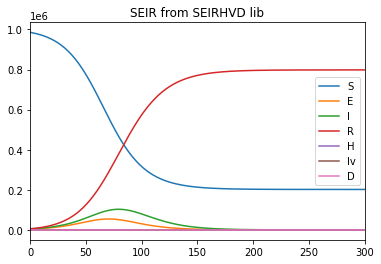

In [5]:
# Plot matplotlib
plt.plot(model.t,model.S,label='S')
plt.plot(model.t,model.E,label='E')
plt.plot(model.t,model.I,label='I')
plt.plot(model.t,model.R,label='R')
plt.plot(model.t,model.H,label='H')
plt.plot(model.t,model.Iv,label='Iv')
plt.plot(model.t,model.D,label='D')
plt.xlim(0,300)
plt.legend(loc=0)
plt.title('SEIR from SEIRHVD lib')
plt.show()

# Effectivity and Iv_ac/Itot_ac proportion

In [45]:
vac_eff = list(np.arange(0,1.1,0.1))
#Psi = cv19functions.events(values=[0,20000,0],days=[[0,5],[5,25],[25,500]])
population = 1000000
Sv0 = population*0.5

In [46]:
colors = plt.cm.rainbow_r(np.linspace(0,1,len(vac_eff)))

In [56]:
model3 = CV19SIM(config = config,model='SEIRHVD')#,vac_eff=vac_eff,population=population,Sv=Sv0)

In [54]:
model2.config

'cfg/SEIRHVD.toml'

In [57]:
model3.solve()

ValueError: setting an array element with a sequence.

In [49]:
sims = model3.sims

In [34]:
fig, axs = plt.subplots(figsize=(10,6),linewidth=5,edgecolor='black',facecolor="white")

axs.set_ylabel('Infectados Activos totales')

for i in range(len(sims)):
    axs.plot(sims[i].t,sims[i].I,linestyle='dashed',color=colors[i])

axs2 = axs.twinx()
for i in range(len(sims)):
    axs2.plot(sims[i].t,sims[i].Iv_ac/sims[i].I_ac,label='Veff: '+"{:#.1g}".format(sims[i].vac_eff(0)),color=colors[i])    

    
axs2.set_ylabel('Iv/I')

#axs2.tick_params(axis='y', labelcolor='tab:blue')
#axs2.set_xlim(0,200)
#lines, labels = axs.get_legend_handles_labels()
#lines2, labels2 = axs2.get_legend_handles_labels()
#axs.legend(lines + lines2, labels + labels2, loc=[0.05,0.1])
#axs.legend(loc=[0.05,0.05])
#axs.legend(loc=[0.05,0.17])

fig.suptitle('Iv/Itot proportion depending on effectivity')
#axs.legend(loc=1)
axs2.legend(loc=0)
fig.show()

## Including beta

In [58]:
beta = list(np.arange(0.1,0.3,0.1))
model4 = CV19SIM(config = config,model='SEIRHVD',beta=beta,betav='beta',vac_eff=vac_eff,population=population,Sv=Sv0)

In [59]:
model4.solve()

ValueError: setting an array element with a sequence.

# Hospitalization CFR variable

In [37]:
pH_R = cv19functions.events(values=[0.7,0.6],days=[[0,30],[30,500]])
pH_D = cv19functions.events(values=[0.3,0.4],days=[[0,30],[30,500]])

In [38]:
%%capture
# Input configuration file
config = 'cfg/SEIRHVD.toml'
# Build simulation object

model1 = SEIRHVD(config = config, H_cap=4000, pH_R = pH_R,pH_D = pH_D)
# Simulate (solve ODE)
model1.integrate()

In [39]:
# Plot matplotlib
#plt.plot(model.t,model.S,label='S')
#plt.plot(model.t,model.E,label='E')
plt.plot(model1.t,model1.I,label='I')
plt.plot(model1.t,model1.Im,label='Im')
plt.plot(model1.t,model1.Icr,label='Icr')
#plt.plot(model.t,model.R,label='R')
plt.xlim(0,300)
plt.legend(loc=0)
plt.title('SEIR from SEIRHVD lib')
plt.show()

In [40]:
# Plot matplotlib
#plt.plot(model1.t,model1.H,color='tab:red',label='H 1')
plt.plot(model1.t,model1.D_d,color='tab:red',linestyle='dotted',label='D 1')
#plt.plot(model1.t,[model1.H_cap]*len(model.t),color='tab:red',linestyle='dashed',label='H_cap 1')
plt.plot(model1.t,[pH_D(i) for i in model.t],color='tab:red',linestyle='dashed',label='pH_D')

#plt.plot(np.arange(model_vac.tsim),[Psi(i) for i in np.arange(model_vac.tsim)])
plt.legend(loc=0)
plt.title('ICU capacity and deaths')
plt.show()

# Vaccines amount, effectivity  and deaths
(work in progress)

In [19]:
eff = list(np.arange(0,1.1,0.1))
amount = np.linspace(0,30000,31)

In [20]:
# Vaccine campaign
vac_d = [cv19functions.events(values=[0,i,0],days=[[0,40],[40,60],[60,500]]) for i in amount]

In [21]:
%%capture
# Input configuration file
config = 'cfg/SEIRHVD_SEIR.toml'
# Build simulation object
models = []
for i in eff:
    aux = []
    for j in vac_d:
        a = SEIRHVD(config = config,vac_d=j,vac_eff = i)
        a.integrate()
        aux.append(a)
    models.append(aux)
        # Simulate (solve ODE)
#model_vac.integrate()

In [ ]:
# Plot matplotlib
plt.plot(model_vac.t,model_vac.I,label='I with vaccines')
plt.plot(model.t,model.I,label='I no vaccines')
plt.plot(model_vac.t,model_vac.Iv,label='Vaccinated infected')
plt.plot(np.arange(model_vac.tsim),[vac_d(i) for i in np.arange(model_vac.tsim)])
plt.xlim(0,300)
plt.legend(loc=0)
plt.title('SEIRV')
plt.show()

In [ ]:
type(vac_d)

In [ ]:
model_vac2 = [SEIRHVD(config = config,vac_d=0.7,vac_eff = i) for i in vac_eff]
for i in model_vac2:
    i.solve()

In [ ]:
colors = plt.cm.rainbow_r(np.linspace(0,1,len(vac_eff)))

In [ ]:
i = 0
for model_vac in model_vac2:
    #plt.plot(model_vac.t,model_vac.I,label='I with vaccines')
    "{:#.2g}".format(i)
    plt.plot(model_vac.t,model_vac.I,label='I eff:'+"{:#.1g}".format(model_vac.vac_eff(0)),color=colors[i])
    #plt.plot(model_vac.t,model_vac.Iv,label='Iv eff:'+"{:#.1g}".format(model_vac.v(0)),color=colors[i],linestyle='dashed')
    i+=1
plt.plot(np.arange(model_vac.tsim),[vac_d(i) for i in np.arange(model_vac.tsim)])
plt.legend(loc=0)

plt.xlim(0,300)
plt.title('Vaccines effectivity')
plt.show() 